### Scaling Preprocessing
- 0 ~ 1, -1 ~ 1, z-score 변환 중에 선택해서 범위를 축소하는 작업을 의미한다.
- Pretrained Model은 주로 tf와 torch 프레임워크 방식을 사용한다.
- tf는 -1 ~ 1, torch는 z-score 변환하는 것이 각 프레임워크의 전통이다.
<img src="./images/scaling.png" width="400" style="margin-top:20px; margin-left: -50px">

##### 동물 분류

https://drive.google.com/file/d/1_d8RcCM21XneorFe_m4939erMkCnccS1/view?usp=drive_link

In [1]:
file = open('./datasets/animals/translate.py', 'r')
content = file.readline()
content = content[content.index('{'): content.index('}') + 1]
content1 = eval(content)
content2 = {v : k for k, v in content1.items()}

file.close()

print(content1, content2, sep='\n')

{'cane': 'dog', 'cavallo': 'horse', 'elefante': 'elephant', 'farfalla': 'butterfly', 'gallina': 'chicken', 'gatto': 'cat', 'mucca': 'cow', 'pecora': 'sheep', 'scoiattolo': 'squirrel', 'dog': 'cane', 'elephant': 'elefante', 'butterfly': 'farfalla', 'chicken': 'gallina', 'cat': 'gatto', 'cow': 'mucca', 'spider': 'ragno', 'squirrel': 'scoiattolo'}
{'dog': 'cane', 'horse': 'cavallo', 'elephant': 'elefante', 'butterfly': 'farfalla', 'chicken': 'gallina', 'cat': 'gatto', 'cow': 'mucca', 'sheep': 'pecora', 'squirrel': 'scoiattolo', 'cane': 'dog', 'elefante': 'elephant', 'farfalla': 'butterfly', 'gallina': 'chicken', 'gatto': 'cat', 'mucca': 'cow', 'ragno': 'spider', 'scoiattolo': 'squirrel'}


In [2]:
import os
from glob import glob

root = './datasets/animals/original/'
directories = glob(os.path.join(root, '*'))
print(directories)

for directory in directories:
    try:
        os.rename(directory, os.path.join(root, content1[directory[directory.rindex('\\') + 1:]]))
    except KeyError as e:
        os.rename(directory, os.path.join(root, content2[directory[directory.rindex('\\') + 1:]]))

['./datasets/animals/original\\cane', './datasets/animals/original\\cavallo', './datasets/animals/original\\elefante', './datasets/animals/original\\farfalla', './datasets/animals/original\\gallina', './datasets/animals/original\\gatto', './datasets/animals/original\\mucca', './datasets/animals/original\\pecora', './datasets/animals/original\\ragno', './datasets/animals/original\\scoiattolo']


In [3]:
directories = glob(os.path.join(root, '*'))
print(directories)

['./datasets/animals/original\\butterfly', './datasets/animals/original\\cat', './datasets/animals/original\\chicken', './datasets/animals/original\\cow', './datasets/animals/original\\dog', './datasets/animals/original\\elephant', './datasets/animals/original\\horse', './datasets/animals/original\\sheep', './datasets/animals/original\\spider', './datasets/animals/original\\squirrel']


In [4]:
# 디렉토리 이름을 모두 가져오기(list 타입으로 변환)
directory_names = list(map(lambda directory: directory[directory.rindex("\\") + 1:], directories))
directory_names

['butterfly',
 'cat',
 'chicken',
 'cow',
 'dog',
 'elephant',
 'horse',
 'sheep',
 'spider',
 'squirrel']

In [5]:
# 전체 파일명을 디렉토리명과 일치하게 바꾸자!(예: dog1.png, dog2.png, ...)
# os.rename(old, new)
# 1. directory_names
# 2. os.listdir()
# os.listdir(os.path.join(root, 'dog'))

root = './datasets/animals/original/'

for name in directory_names:
    for i, file_name in enumerate(os.listdir(os.path.join(root, name))):
        old_file = os.path.join(root + name + '/', file_name)
        new_file = os.path.join(root + name + '/', name + str(i + 1) + '.png')
        
        os.rename(old_file, new_file)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 224
BATCH_SIZE = 64

image_data_generator = ImageDataGenerator(rescale=1./255)

generator = image_data_generator.flow_from_directory(
    root,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

print(generator.class_indices)

Found 26179 images belonging to 10 classes.
{'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4, 'elephant': 5, 'horse': 6, 'sheep': 7, 'spider': 8, 'squirrel': 9}


In [7]:
target_name = {v : k for k, v in generator.class_indices.items()}
target_name

{0: 'butterfly',
 1: 'cat',
 2: 'chicken',
 3: 'cow',
 4: 'dog',
 5: 'elephant',
 6: 'horse',
 7: 'sheep',
 8: 'spider',
 9: 'squirrel'}

In [11]:
target_names = []
for target in generator.classes:
    target_names.append(target_name[target])

In [13]:
import pandas as pd

animal_df = pd.DataFrame({'file_paths': generator.filepaths, 'target_names': target_names, 'targets': generator.classes})
animal_df.file_paths = animal_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))
animal_df

,file_paths,target_names,targets
0,./datasets/animals/original/butterfly/butterfl...,butterfly,0
1,./datasets/animals/original/butterfly/butterfl...,butterfly,0
2,./datasets/animals/original/butterfly/butterfl...,butterfly,0
3,./datasets/animals/original/butterfly/butterfl...,butterfly,0
4,./datasets/animals/original/butterfly/butterfl...,butterfly,0
...,...,...,...
26174,./datasets/animals/original/squirrel/squirrel9...,squirrel,9
26175,./datasets/animals/original/squirrel/squirrel9...,squirrel,9
26176,./datasets/animals/original/squirrel/squirrel9...,squirrel,9
26177,./datasets/animals/original/squirrel/squirrel9...,squirrel,9


In [14]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_targets, test_targets = train_test_split(animal_df.file_paths, animal_df.targets, stratify=animal_df.targets, test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(test_targets.value_counts())

targets
4    3890
8    3857
2    2478
6    2098
0    1690
3    1493
9    1490
7    1456
1    1334
5    1157
Name: count, dtype: int64
targets
4    973
8    964
2    620
6    525
0    422
3    373
9    372
7    364
1    334
5    289
Name: count, dtype: int64


In [15]:
train_train_images, validation_images, train_train_targets, validation_targets = \
train_test_split(train_images, train_targets, stratify=train_targets, test_size=0.2, random_state=124)

print(train_train_targets.value_counts(), train_train_images.shape[0])
print(validation_targets.value_counts(), validation_images.shape[0])
print(test_targets.value_counts(), test_targets.shape[0])

targets
4    3112
8    3086
2    1982
6    1678
0    1352
3    1194
9    1192
7    1165
1    1067
5     926
Name: count, dtype: int64 16754
targets
4    778
8    771
2    496
6    420
0    338
3    299
9    298
7    291
1    267
5    231
Name: count, dtype: int64 4189
targets
4    973
8    964
2    620
6    525
0    422
3    373
9    372
7    364
1    334
5    289
Name: count, dtype: int64 5236


In [16]:
import shutil
import os.path

root = './datasets/animals/'

for filepath in train_images:
#     './datasets/animals/original/butterfly/butterfly1.png'
    animal_dir = filepath[filepath.find('original/') + 9:filepath.rindex('/') + 1]
    destination = os.path.join(root, 'train/' + animal_dir)
    
    if not os.path.exists(destination):
        os.mkdir(destination)
    
    shutil.copy2(filepath, destination)

In [17]:
# valid copy
import shutil
import os.path

root = './datasets/animals/'

for filepath in validation_images:
#     './datasets/animals/original/butterfly/butterfly1.png'
    animal_dir = filepath[filepath.find('original/') + 9:filepath.rindex('/') + 1]
    destination = os.path.join(root, 'validation/' + animal_dir)
    
    if not os.path.exists(destination):
        os.mkdir(destination)
    
    shutil.copy2(filepath, destination)

In [18]:
# test copy
# valid copy
import shutil
import os.path

root = './datasets/animals/'

for filepath in test_images:
#     './datasets/animals/original/butterfly/butterfly1.png'
    animal_dir = filepath[filepath.find('original/') + 9:filepath.rindex('/') + 1]
    destination = os.path.join(root, 'test/' + animal_dir)
    
    if not os.path.exists(destination):
        os.mkdir(destination)
    
    shutil.copy2(filepath, destination)

In [24]:
train_df = animal_df.loc[train_train_images.index].reset_index(drop=True)
validation_df = animal_df.loc[validation_images.index].reset_index(drop=True)
test_df = animal_df.loc[test_images.index].reset_index(drop=True)

print(train_df.shape[0])
print(validation_df.shape[0])
print(test_df.shape[0])

16754
4189
5236


##### flow_from_dataframe(dataframe, x_col, y_col, target_size, class_mode, batch_size, shuffle)
- flow_from_dataframe()은 dataframe 인자로 DataFrame 객체를 전달 받는다.
- x_col은 DataFrame에서 image 파일의 절대경로 위치를 나타내는 column명을 전달한다.
- y_col은 DataFrame에서 target값 column명을 전달한다. 이 때 y_col로 지정된 컬럼은 반드시 문자열(object type)만 가능하다.
- y_col의 경우 미리 encoding(label 또는 one-hot)을 진행해서 숫자값으로 변경한 뒤 전달하면 오류가 발생한다.

In [27]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

train_generator = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, brightness_range=(0.7, 1.3), horizontal_flip=True, vertical_flip=True, rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_flow = train_generator.flow_from_dataframe(dataframe=train_df, x_col='file_paths', y_col='target_names', batch_size=BATCH_SIZE, target_size=(IMAGE_SIZE, IMAGE_SIZE), class_mode='categorical', shuffle=True)
validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df, x_col='file_paths', y_col='target_names', batch_size=BATCH_SIZE, target_size=(IMAGE_SIZE, IMAGE_SIZE), class_mode='categorical', shuffle=False)
test_flow = test_generator.flow_from_dataframe(dataframe=test_df, x_col='file_paths', y_col='target_names', batch_size=BATCH_SIZE, target_size=(IMAGE_SIZE, IMAGE_SIZE), class_mode='categorical', shuffle=False)

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 16754 validated image filenames belonging to 10 classes.
Found 4189 validated image filenames belonging to 10 classes.
Found 5236 validated image filenames belonging to 10 classes.
{'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4, 'elephant': 5, 'horse': 6, 'sheep': 7, 'spider': 8, 'squirrel': 9}
{'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4, 'elephant': 5, 'horse': 6, 'sheep': 7, 'spider': 8, 'squirrel': 9}
{'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4, 'elephant': 5, 'horse': 6, 'sheep': 7, 'spider': 8, 'squirrel': 9}


In [29]:
images_array, targets = next(train_flow)
print(images_array.shape, targets.shape)
print(images_array[0])
print(targets[0])

(64, 224, 224, 3) (64, 10)
[[[0.14509805 0.1254902  0.37647063]
  [0.14509805 0.14117648 0.37254903]
  [0.14901961 0.15686275 0.3647059 ]
  ...
  [0.227451   0.48627454 0.14117648]
  [0.18431373 0.45882356 0.10588236]
  [0.17254902 0.4431373  0.09411766]]

 [[0.15686275 0.10196079 0.427451  ]
  [0.15686275 0.10588236 0.41960788]
  [0.15294118 0.10980393 0.41176474]
  ...
  [0.18823531 0.45882356 0.10588236]
  [0.17254902 0.44705886 0.09411766]
  [0.16078432 0.4431373  0.09019608]]

 [[0.23137257 0.14117648 0.5019608 ]
  [0.21960786 0.13333334 0.4901961 ]
  [0.20784315 0.1254902  0.4784314 ]
  ...
  [0.17254902 0.4431373  0.09411766]
  [0.1764706  0.44705886 0.09803922]
  [0.16078432 0.44705886 0.09411766]]

 ...

 [[0.15294118 0.42352945 0.09411766]
  [0.16078432 0.43529415 0.10196079]
  [0.18039216 0.4666667  0.12156864]
  ...
  [0.9607844  0.7607844  1.        ]
  [0.9607844  0.7607844  1.        ]
  [0.9607844  0.7607844  1.        ]]

 [[0.15294118 0.42352945 0.09411766]
  [0.16470

In [34]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        base_model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        base_model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        base_model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')

    base_model_output = base_model.output

    x = GlobalAveragePooling2D()(base_model_output)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(10, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    else:
        pass
    
    return model

In [36]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model= create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_4[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]'

 ormalization)                                                                                    
                                                                                                  
 block4_sepconv2_act (Activ  (None, 28, 28, 728)          0         ['block4_sepconv1_bn[0][0]']  
 ation)                                                                                           
                                                                                                  
 block4_sepconv2 (Separable  (None, 28, 28, 728)          536536    ['block4_sepconv2_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block4_sepconv2_bn (BatchN  (None, 28, 28, 728)          2912      ['block4_sepconv2[0][0]']     
 ormalization)                                                                                    
          

 ation)                                                                                           
                                                                                                  
 block7_sepconv1 (Separable  (None, 14, 14, 728)          536536    ['block7_sepconv1_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block7_sepconv1_bn (BatchN  (None, 14, 14, 728)          2912      ['block7_sepconv1[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block7_sepconv2_act (Activ  (None, 14, 14, 728)          0         ['block7_sepconv1_bn[0][0]']  
 ation)                                                                                           
          

 block9_sepconv3_bn (BatchN  (None, 14, 14, 728)          2912      ['block9_sepconv3[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 add_43 (Add)                (None, 14, 14, 728)          0         ['block9_sepconv3_bn[0][0]',  
                                                                     'add_42[0][0]']              
                                                                                                  
 block10_sepconv1_act (Acti  (None, 14, 14, 728)          0         ['add_43[0][0]']              
 vation)                                                                                          
                                                                                                  
 block10_sepconv1 (Separabl  (None, 14, 14, 728)          536536    ['block10_sepconv1_act[0][0]']
 eConv2D) 

                                                                                                  
 block12_sepconv3_act (Acti  (None, 14, 14, 728)          0         ['block12_sepconv2_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 block12_sepconv3 (Separabl  (None, 14, 14, 728)          536536    ['block12_sepconv3_act[0][0]']
 eConv2D)                                                                                         
                                                                                                  
 block12_sepconv3_bn (Batch  (None, 14, 14, 728)          2912      ['block12_sepconv3[0][0]']    
 Normalization)                                                                                   
                                                                                                  
 add_46 (A

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath='./callback_files/weights.{epoch:03d}-{val_loss:.4f}.h5', 
    monitor='val_loss', 
    save_best_only=True, 
    save_weights_only=True, 
    mode='min', 
    verbose=1)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.1,
    patience=2, 
    mode='min', 
    verbose=1)

ely_cb = EarlyStopping(
    monitor='val_loss', 
    patience=4, 
    mode='min', 
    verbose=1)

In [39]:
N_EPOCHS = 10

history = model.fit(train_flow, epochs=N_EPOCHS, validation_data=validation_flow, callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10
  1/262 [..............................] - ETA: 2:38:05 - loss: 2.4065 - acc: 0.0625

KeyboardInterrupt: 

In [ ]:
model.evaluate(test_flow)

In [ ]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

##### scaling
- pretrained model은 각각 고유한 scaling 방식을 적용한다.

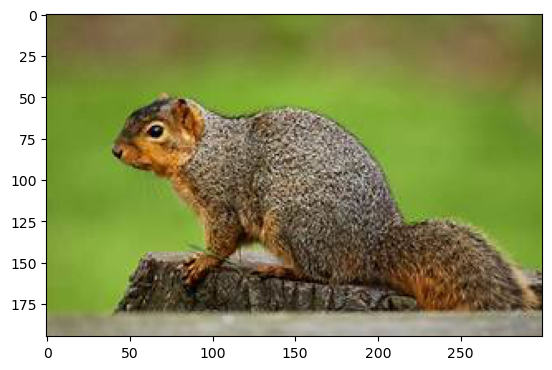

In [45]:
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread(train_df.file_paths.iloc[15000]), cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [46]:
def preprocessing_scaling(x, mode='tf'):
    if mode == 'tf': # -1 ~ 1 scale
        x = x/127.5
        x -= 1.
    
    elif mode == 'torch': # z-score scale
        x = x/255.
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        
        x[:, :, 0] = (x[:, :, 0] - mean[0])/std[0]
        x[:, :, 1] = (x[:, :, 1] - mean[1])/std[1]
        x[:, :, 2] = (x[:, :, 2] - mean[2])/std[2]
        
    return x

scaled_image_tf = preprocessing_scaling(image, mode='tf')
scaled_image_torch = preprocessing_scaling(image, mode='torch')

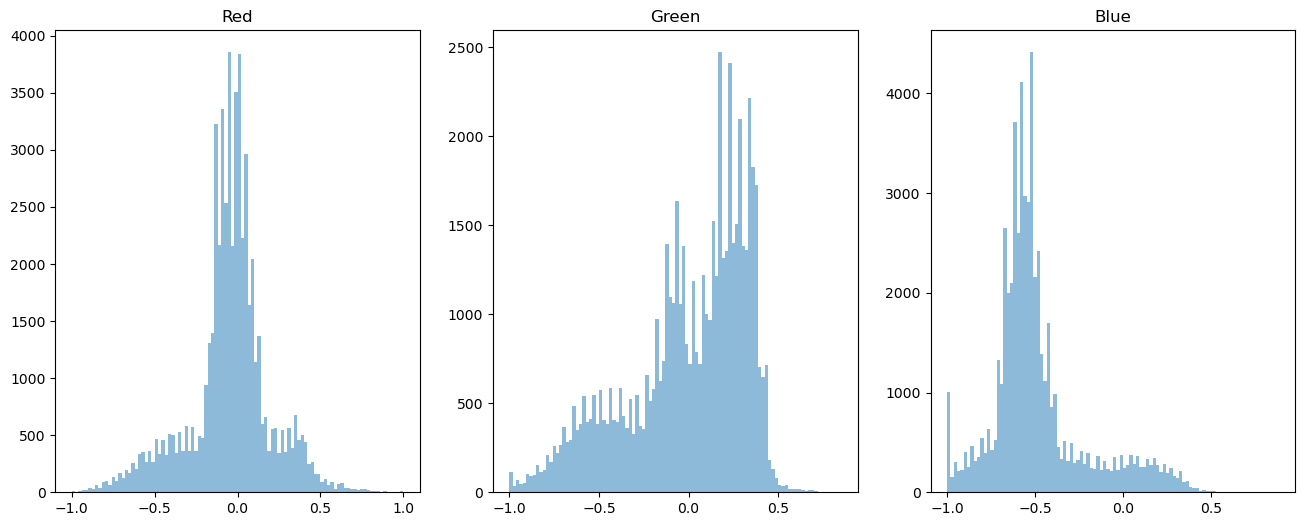

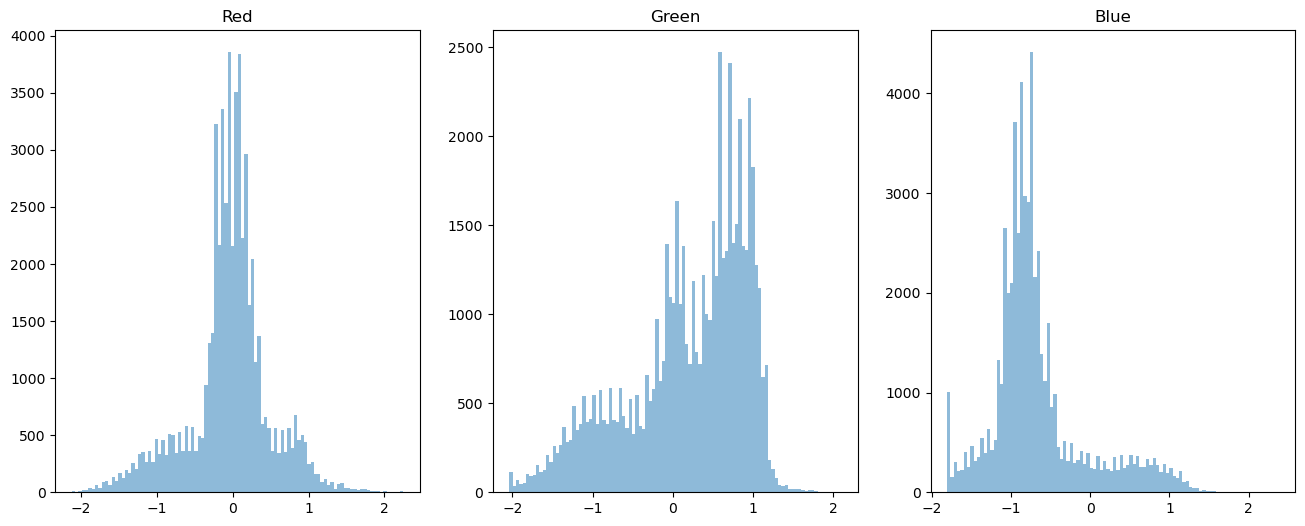

In [47]:
def show_pixel_histogram(image):
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

    for i in range(3):
        # i값 0 일때 Red 채널, i값 1일때 Green Channel, i값 2일때 Blue Channel Histogram 표현 
        axs[i].hist(image[:, :, i].flatten(), bins=100, alpha=0.5)
        if i==0:
            title_str = 'Red'
        elif i==1:
            title_str = 'Green'
        else: 
            title_str = 'Blue'
        axs[i].set(title=title_str)
        
show_pixel_histogram(scaled_image_tf)
show_pixel_histogram(scaled_image_torch)

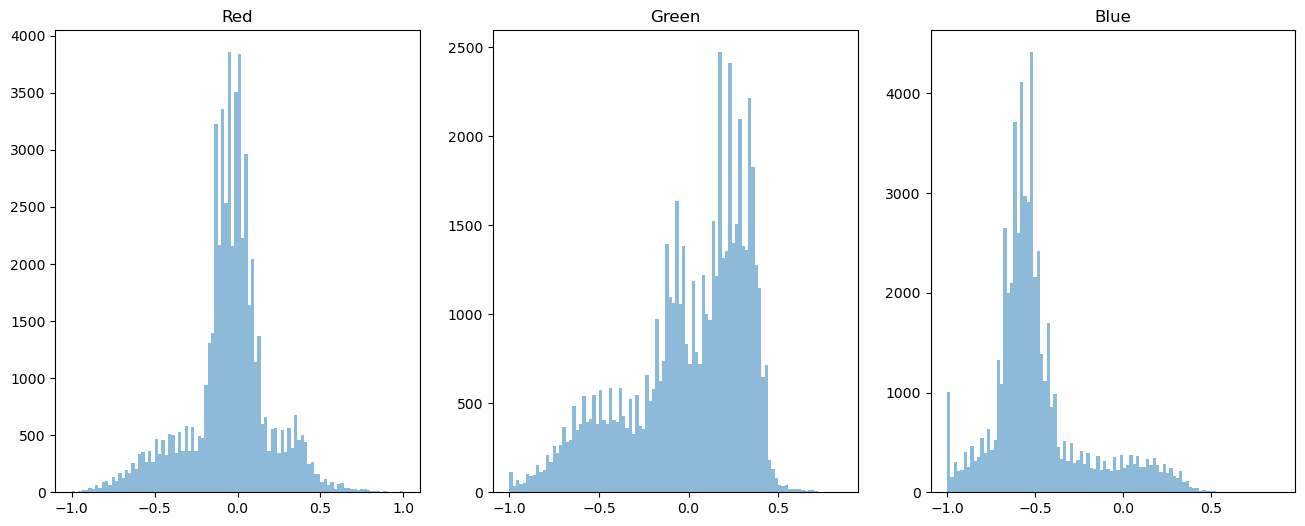

In [48]:
from tensorflow.keras.applications.xception import preprocess_input

# Xception의 scaling 방식은 tf
scaled_image_xception = preprocess_input(image)
show_pixel_histogram(scaled_image_xception)

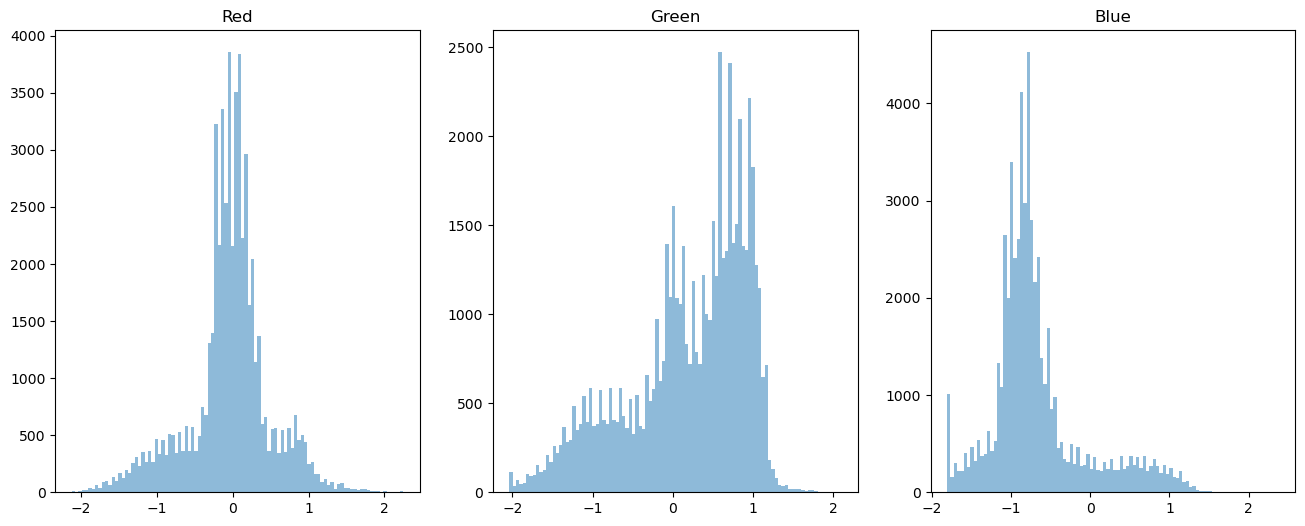

In [49]:
from tensorflow.keras.applications.densenet import preprocess_input

# DenseNet의 scaling 방식은 torch
scaled_image_xception = preprocess_input(image)
show_pixel_histogram(scaled_image_xception)

In [50]:
from tensorflow.keras.applications.densenet import preprocess_input

IMAGE_SIZE = 224
BATCH_SIZE = 64

train_generator = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, brightness_range=(0.7, 1.3), horizontal_flip=True, vertical_flip=True, preprocessing_function=preprocess_input)

# validation data와 test data는 augmentation을 적용할 필요 없다.
validation_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_flow = train_generator.flow_from_dataframe(
    dataframe=train_df, 
    x_col='file_paths', 
    y_col='target_names', 
    # 원본 이미지를 최종 resize할 image size
    target_size=(IMAGE_SIZE, IMAGE_SIZE), 
    # 문자열 label을 자동 Encoding. 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(
    dataframe=validation_df, 
    x_col='file_paths', 
    y_col='target_names', 
    # 원본 이미지를 최종 resize할 image size
    target_size=(IMAGE_SIZE, IMAGE_SIZE), 
    # 문자열 label을 자동 Encoding. 
    class_mode='categorical', 
    batch_size=BATCH_SIZE)

test_flow = test_generator.flow_from_dataframe(
    dataframe=test_df, 
    x_col='file_paths', 
    y_col='target_names', 
    # 원본 이미지를 최종 resize할 image size
    target_size=(IMAGE_SIZE, IMAGE_SIZE), 
    # 문자열 label을 자동 Encoding. 
    class_mode='categorical', 
    batch_size=BATCH_SIZE)

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 16754 validated image filenames belonging to 10 classes.
Found 4189 validated image filenames belonging to 10 classes.
Found 5236 validated image filenames belonging to 10 classes.
{'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4, 'elephant': 5, 'horse': 6, 'sheep': 7, 'spider': 8, 'squirrel': 9}
{'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4, 'elephant': 5, 'horse': 6, 'sheep': 7, 'spider': 8, 'squirrel': 9}
{'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4, 'elephant': 5, 'horse': 6, 'sheep': 7, 'spider': 8, 'squirrel': 9}
